### PAPER's Figure 1

In [26]:
#############################################
#BASIC PACKAGES
import sys
from copy import deepcopy as dcopy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#############################################
#PATH TO SCRIPTS FOLDER
path = '/data/AMARINS/CMBWLxHI-CODES/scripts/'
sys.path.insert(1, path)
import cross_functions_theory      as cxft
import handling_data               as hdata

#############################################
## MATPLOTLIB FEATURES
from matplotlib import cm
font = {'weight' : 'bold','size'   : 22}
mpl.rc('font', **font)
mpl.rc('font',   size=209)  #set defaults so that the plots are readable
mpl.rc('axes',   titlesize=20)
mpl.rc('axes',   labelsize=20)
mpl.rc('xtick',  labelsize=20)
mpl.rc('ytick',  labelsize=20)
mpl.rc('legend', fontsize =20)
mpl.rc('figure', titlesize=20)
mpl.rc('text',   usetex=True)
## FURTHER MATPLOTLIB FEATURES
import matplotlib.ticker as mticker
from matplotlib.lines import Line2D

## LOW-Z

In [35]:
##########################################
## THEORETICAL
prefix = 'lowz'
suffix = 'nch30_980_1260'
##########################################
## PATH to THEORECTICAL APS 
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
##
savefigs = True

In [36]:
##########################################
## LOADING DATA
clf1 = np.loadtxt(filepath_field1).T
clf2 = np.loadtxt(filepath_field2).T
clcx = np.loadtxt(filepath_cross ).T
##
clf1_dict = cxft.cls_from_matrix2dict(clf1)
clf2_dict = cxft.cls_from_matrix2dict(clf2)
clcx_dict = cxft.cls_from_matrix2dict(clcx)
##
nch = int(clf1.shape[0])-1
del clf1, clf2, clcx

In [37]:
################################
# REDSHIFT TO BE REPRESENTED
N         = 4
zeff      = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['zeff']
ibins     = cxft.get_zeff(numin =980, numax =1260, nbands= nch, n_curves=N)['bins']
cticks    = dcopy(ibins)+1
bin_names = np.asarray( list(clcx_dict.keys())[1:])
################################

'/data/AMARINS/CMBWLxHI-CODES/images/lowz_cl_hi_theory__nch30_980_1260.png'

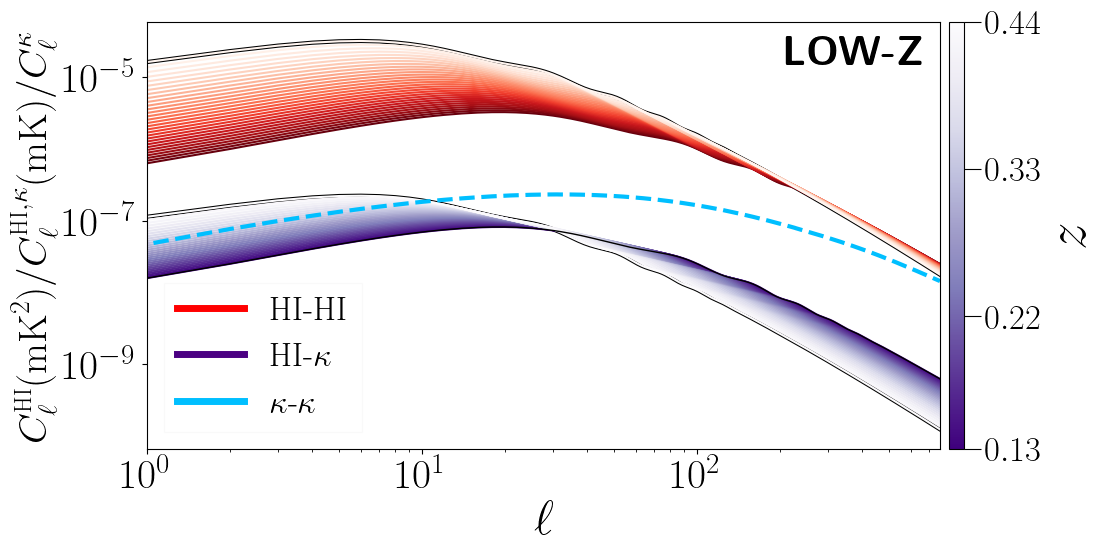

In [42]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(20,14))
plt.subplots_adjust(top=1.,right=1.6)
############################################################
c    = ibins
norm = mpl.colors.Normalize(vmin=1, vmax=int(nch))
cmap_f1 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds.reversed())
cmap_f1.set_array([])
cmap_cx = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples.reversed())
cmap_cx.set_array([])
############################################################
ax.loglog(clcx_dict['l'], clcx_dict['bin{}'.format(1)],linestyle='solid', linewidth=3, color='black')
ax.loglog(clf1_dict['l'], clf1_dict['bin{}'.format(1)],linestyle='solid', linewidth=3, color='black')     
for i,iname in enumerate(np.flip(bin_names)):
    if iname!='l':ax.loglog(clcx_dict['l'], clcx_dict[iname],linestyle='solid' , color=cmap_cx.to_rgba(i + 1))
    if iname!='l':ax.loglog(clf1_dict['l'], clf1_dict[iname],linestyle='solid' , color=cmap_f1.to_rgba(i + 1))   
ax.loglog(clf1_dict['l'], clcx_dict['bin{}'.format(nch)],linestyle='solid', linewidth=1, color='black')   
ax.loglog(clf2_dict['l'], clf2_dict['bin1'],linestyle='dashed', color='deepskyblue', lw=3)

#ax.set_ylabel(r'$C_{\ell}\ [\textrm{mK}^{\Large\textrm{(m)}}]$', fontsize=35); ax.set_xlabel(r'$\ell$', fontsize=35)
ax.set_ylabel(r'$C^{\LARGE{\textrm{HI}}}_{\ell}(\textrm{mK}^2)$' + r'$/$'+ r'$C^{\LARGE{\textrm{HI}},\tiny{\kappa}}_{\ell}(\textrm{mK})$'+ r'$/$'+ r'$C^{\tiny{\kappa}}_{\ell}$', fontsize=29); ax.set_xlabel(r'$\ell$', fontsize=35)
ax.set_xlim([1, clf1_dict['l'].max()])
ax.tick_params(axis='both', which='major', labelsize=30)
############################################################
cbar=fig.colorbar(cmap_cx, ax=ax, #location='top',
                  orientation='vertical',# extend="both",
                  pad=0.01, aspect=30, ticks=cticks,
                  format=mticker.FixedFormatter(np.array([ r'${:.2f}$'.format(izeff) for izeff in np.flip(zeff) ])) )
cbar.ax.tick_params(axis='both', which='major', labelsize=25, length=12)
cbar.set_label( label=r'$z$', fontsize=40)
#
#cbar = fig.colorbar(cmap_f1, ax=ax, #location='top', #orientation='horizontal', 
#                    pad=0.003, aspect=30, ticks=cticks,
#                    format=mticker.FixedFormatter([]))     
#cbar.set_label( label=None)
#cbar.ax.tick_params( which='major', direction='inout', length=20)
###########################################################
custom_lines = [Line2D([], [], color='red',
                             linewidth=5, linestyle='solid'),
                Line2D([], [], color='indigo',
                             linewidth=5, linestyle='solid'),
                Line2D([], [], color='deepskyblue',
                             linewidth=5, linestyle='solid')]
ax.legend(custom_lines, [r'$\textrm{HI-HI}$',#\ [\textrm{mK}^2]$',#\ (\textrm{m}=2)$', 
                         r'$\textrm{HI-}\kappa$',#\ [\textrm{mK}^1]$',#\ (\textrm{m}=1)$', 
                         r'$\kappa\textrm{-}\kappa$'#\ [\textrm{mK}^0]$'#\ (\textrm{m}=2)$', 
                        ], ncols=1,
         fontsize=24, loc='lower left',framealpha=0.1, fancybox=False)

ax.text(x=300-90, y=1.5e-5, s=r'$\textbf{LOW-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
###########################################################
if suffix==None: pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}_{}.png".format( prefix, 'cl_hi_theory')
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}.png".format(prefix, 'cl_hi_theory',suffix)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight');
pathname

## HIGH-Z

In [43]:
##########################################
## THEORETICAL
prefix = 'highz'
suffix = 'nch70_350_1050'
##########################################
## DATA's PATH
filepath_field1 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_HI_cl_{}.txt'.format(prefix, suffix)
filepath_field2 = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWL_cl_{}.txt'.format(prefix, suffix)
filepath_cross  = '/data/AMARINS/CMBWLxHI-DATA/theoretical/{}_CMBWLxHI_cl_{}.txt'.format(prefix, suffix)  
##
savefigs = True

In [44]:
##########################################
## LOADING DATA
clf1 = np.loadtxt(filepath_field1).T
clf2 = np.loadtxt(filepath_field2).T
clcx = np.loadtxt(filepath_cross ).T
##
clf1_dict = cxft.cls_from_matrix2dict(clf1)
clf2_dict = cxft.cls_from_matrix2dict(clf2)
clcx_dict = cxft.cls_from_matrix2dict(clcx)
##
nch = int(clf1.shape[0])-1
del clf1, clf2, clcx

In [45]:
################################
# REDSHIFT TO BE REPRESENTED
zeff      = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['zeff']
ibins     = cxft.get_zeff(numin =350, numax =1050, nbands= nch, n_curves=N)['bins']
cticks    = dcopy(ibins)+1
bin_names = np.asarray( list(clcx_dict.keys())[1:])
################################

'/data/AMARINS/CMBWLxHI-CODES/images/highz_cl_hi_theory__nch70_350_1050.png'

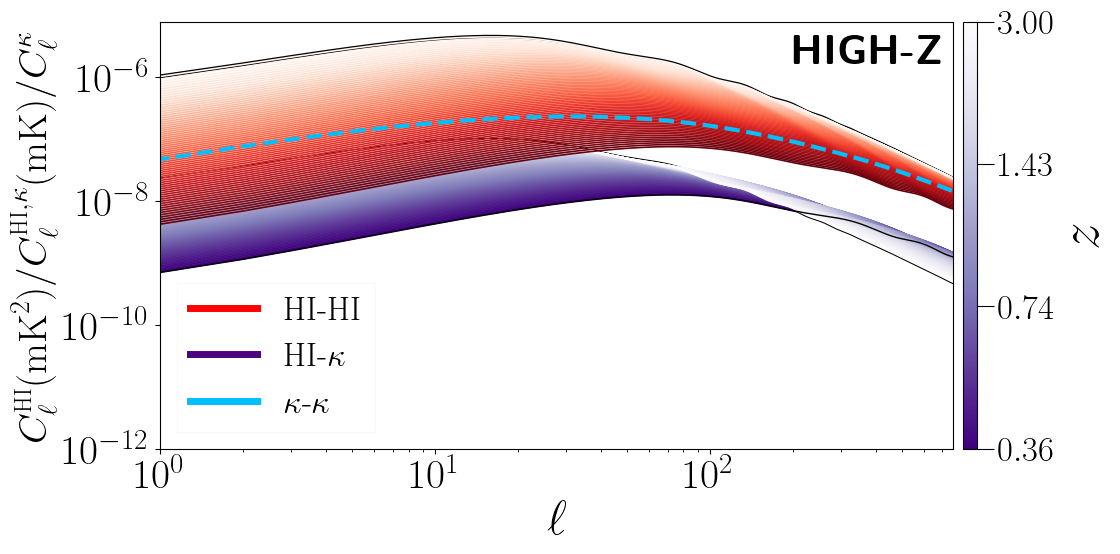

In [46]:
fig, ax  = plt.subplots(nrows=1, ncols=1)#, figsize=(20,14))
plt.subplots_adjust(top=1,right=1.6)
#
bin_names = np.asarray( list(clcx_dict.keys())[1:])
############################################################
c = np.linspace(1, 70, 4, dtype=np.int16)-1#np.unique( np.hstack(( np.array([1]), np.arange(10, nch+10, 10, dtype=np.int8), np.array([nch]) )) )
norm = mpl.colors.Normalize(vmin=1, vmax=int(nch))
cmap_f1 = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds.reversed())
cmap_f1.set_array([])
cmap_cx = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples.reversed())
cmap_cx.set_array([])
############################################################
ax.loglog(clcx_dict['l'], clcx_dict['bin{}'.format(1)],linestyle='solid', linewidth=3, color='black')
ax.loglog(clf1_dict['l'], clf1_dict['bin{}'.format(1)],linestyle='solid', linewidth=3, color='black')     
for i,iname in enumerate(np.flip(bin_names)):
    if iname!='l':ax.loglog(clcx_dict['l'], clcx_dict[iname],linestyle='solid' , color=cmap_cx.to_rgba(i + 1))#, lw=1.2)
for i,iname in enumerate(np.flip(bin_names)):        
    if iname!='l':ax.loglog(clf1_dict['l'], clf1_dict[iname],linestyle='solid' , color=cmap_f1.to_rgba(i + 1), lw=1.2)   
ax.loglog(clf1_dict['l'], clcx_dict['bin{}'.format(nch)],linestyle='solid', linewidth=1, color='black')   
ax.loglog(clf2_dict['l'], clf2_dict['bin1'],linestyle='dashed', color='deepskyblue', lw=3)

#ax.set_ylabel(r'$C_{\ell}\ [\textrm{mK}^{\Large\textrm{(m)}}]$', fontsize=35); ax.set_xlabel(r'$\ell$', fontsize=35)
ax.set_ylabel(r'$C^{\LARGE{\textrm{HI}}}_{\ell}(\textrm{mK}^2)$' + r'$/$'+ r'$C^{\LARGE{\textrm{HI}},\tiny{\kappa}}_{\ell}(\textrm{mK})$'+ r'$/$'+ r'$C^{\tiny{\kappa}}_{\ell}$', fontsize=29); ax.set_xlabel(r'$\ell$', fontsize=35)
ax.set_xlim([1, clf1_dict['l'].max()])
ax.set_ylim([1e-12, 8e-6])
ax.tick_params(axis='both', which='major', labelsize=30)
############################################################
cbar=fig.colorbar(cmap_cx, ax=ax, #location='top',
                  #orientation='horizontal',# extend="both",
                  pad=0.01, aspect=30, ticks=cticks,
                  format=mticker.FixedFormatter(np.array([ r'${:.2f}$'.format(izeff) for izeff in np.flip(zeff) ])) )
cbar.ax.tick_params(axis='both', which='major', labelsize=25, length=12)
cbar.set_label( label=r'$z$', fontsize=40)
#
#cbar = fig.colorbar(cmap_f1, ax=ax, #location='top', #orientation='horizontal', 
#                    pad=0.003, aspect=30, ticks=cticks,
#                    format=mticker.FixedFormatter([]))     
#cbar.set_label( label=None)
#cbar.ax.tick_params( which='major', direction='inout', length=20)
###########################################################
custom_lines = [Line2D([], [], color='red',
                             linewidth=5, linestyle='solid'),
                Line2D([], [], color='indigo',
                             linewidth=5, linestyle='solid'),
                Line2D([], [], color='deepskyblue',
                             linewidth=5, linestyle='solid')]
ax.legend(custom_lines, [r'$\textrm{HI-HI}$',#\ [\textrm{mK}^2]$',#\ (\textrm{m}=2)$', 
                         r'$\textrm{HI-}\kappa$',#\ [\textrm{mK}^1]$',#\ (\textrm{m}=1)$', 
                         r'$\kappa\textrm{-}\kappa$'#\ [\textrm{mK}^0]$'#\ (\textrm{m}=2)$', 
                        ], ncols=1,
         fontsize=24, loc='lower left',framealpha=0.1, fancybox=False)

ax.text(x=300-100, y=1.7e-6, s=r'$\textbf{HIGH-Z}$', 
        fontdict={'family': 'serif', 'color':  None,  'weight': 'bold','size': 30})
###########################################################

if suffix==None: pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}_{}.png".format( prefix, 'cl_hi_theory')
else:            pathname = "/data/AMARINS/CMBWLxHI-CODES/images/{}_{}__{}.png".format(prefix, 'cl_hi_theory',suffix)
if savefigs: plt.savefig(pathname, dpi=100, bbox_inches='tight')
pathname

# 